In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Introduction

We begin by initializing a pandas dataframe from the nba_games.csv file and sorting the rows to be in chronological order. We also observe that the frame has 17772 rows and 151 columns and then list each column in the set.

In [3]:
df = pd.read_csv('nba_games.csv')
df = df.sort_values(by='date', ascending=True)
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,16086,240.0,240.0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,...,69.4,43.7,206.0,104.0,GSW,111,1,2016,2015-10-27,False
1,16904,240.0,240.0,38.0,94.0,0.404,9.0,29.0,0.310,10.0,...,53.2,34.6,162.0,104.0,CHI,97,1,2016,2015-10-27,False
2,16905,240.0,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,...,30.4,29.0,138.0,105.0,CLE,95,0,2016,2015-10-27,True
3,16087,240.0,240.0,41.0,96.0,0.427,9.0,30.0,0.300,20.0,...,37.5,38.9,201.0,120.0,NOP,95,0,2016,2015-10-27,True
4,1225,240.0,240.0,37.0,82.0,0.451,8.0,27.0,0.296,12.0,...,33.3,23.6,132.0,104.0,DET,106,0,2016,2015-10-27,False


In [4]:
print(f"The dataframe represents {df.shape[0]} rows, and {df.shape[1]} columns\n")

print(list(df.columns))

The dataframe represents 17772 rows, and 151 columns

['Unnamed: 0', 'mp', 'mp.1', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', '+/-', 'ts%', 'efg%', '3par', 'ftr', 'orb%', 'drb%', 'trb%', 'ast%', 'stl%', 'blk%', 'tov%', 'usg%', 'ortg', 'drtg', 'mp_max', 'mp_max.1', 'fg_max', 'fga_max', 'fg%_max', '3p_max', '3pa_max', '3p%_max', 'ft_max', 'fta_max', 'ft%_max', 'orb_max', 'drb_max', 'trb_max', 'ast_max', 'stl_max', 'blk_max', 'tov_max', 'pf_max', 'pts_max', '+/-_max', 'ts%_max', 'efg%_max', '3par_max', 'ftr_max', 'orb%_max', 'drb%_max', 'trb%_max', 'ast%_max', 'stl%_max', 'blk%_max', 'tov%_max', 'usg%_max', 'ortg_max', 'drtg_max', 'team', 'total', 'home', 'index_opp', 'mp_opp', 'mp_opp.1', 'fg_opp', 'fga_opp', 'fg%_opp', '3p_opp', '3pa_opp', '3p%_opp', 'ft_opp', 'fta_opp', 'ft%_opp', 'orb_opp', 'drb_opp', 'trb_opp', 'ast_opp', 'stl_opp', 'blk_opp', 'tov_opp', 'pf_opp', 'pts_opp', '+/-_opp', 'ts%_opp', 'efg%_opp

# Initial Feature Selection

We drop the unnecessary columns as well as all the columns with all null values. 

In [5]:
df = df.drop(['Unnamed: 0', 'mp', 'mp.1', 'mp_opp', 'mp_opp.1', '+/-', '+/-_opp',  'mp_max', 'mp_max.1', 'mp_max_opp', 'mp_max_opp.1'], axis=1)
df.head(6)

,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,8.0,...,69.4,43.7,206.0,104.0,GSW,111,1,2016,2015-10-27,False
1,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,11.0,...,53.2,34.6,162.0,104.0,CHI,97,1,2016,2015-10-27,False
2,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,7.0,...,30.4,29.0,138.0,105.0,CLE,95,0,2016,2015-10-27,True
3,41.0,96.0,0.427,9.0,30.0,0.300,20.0,22.0,0.909,21.0,...,37.5,38.9,201.0,120.0,NOP,95,0,2016,2015-10-27,True
4,37.0,82.0,0.451,8.0,27.0,0.296,12.0,15.0,0.800,7.0,...,33.3,23.6,132.0,104.0,DET,106,0,2016,2015-10-27,False
5,37.0,96.0,0.385,12.0,29.0,0.414,20.0,26.0,0.769,23.0,...,57.1,33.8,258.0,121.0,ATL,94,1,2016,2015-10-27,True


In [6]:
cols_to_front = ['date', 'team', 'total', 'team_opp', 'total_opp', 'won']

df = df[cols_to_front + [col for col in df.columns if col not in cols_to_front]]

df.head()

,date,team,total,team_opp,total_opp,won,fg,fga,fg%,3p,...,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,home_opp,season
0,2015-10-27,NOP,95,GSW,111,False,35.0,83.0,0.422,6.0,...,25.2,50.1,19.1,7.9,69.4,43.7,206.0,104.0,1,2016
1,2015-10-27,CLE,95,CHI,97,False,38.0,94.0,0.404,9.0,...,26.0,30.3,2.8,14.0,53.2,34.6,162.0,104.0,1,2016
2,2015-10-27,CHI,97,CLE,95,True,37.0,87.0,0.425,7.0,...,23.8,31.2,2.8,18.5,30.4,29.0,138.0,105.0,0,2016
3,2015-10-27,GSW,111,NOP,95,True,41.0,96.0,0.427,9.0,...,13.6,43.4,5.3,6.3,37.5,38.9,201.0,120.0,0,2016
4,2015-10-27,ATL,94,DET,106,False,37.0,82.0,0.451,8.0,...,24.8,35.6,3.2,4.7,33.3,23.6,132.0,104.0,0,2016


## Regression Plots 

Our aim here was to visualize the relations between each of the core statisticss of Basketball and Winning Percentage. We can observe a highly positive relationship between the FG%, 3P% and Winning.

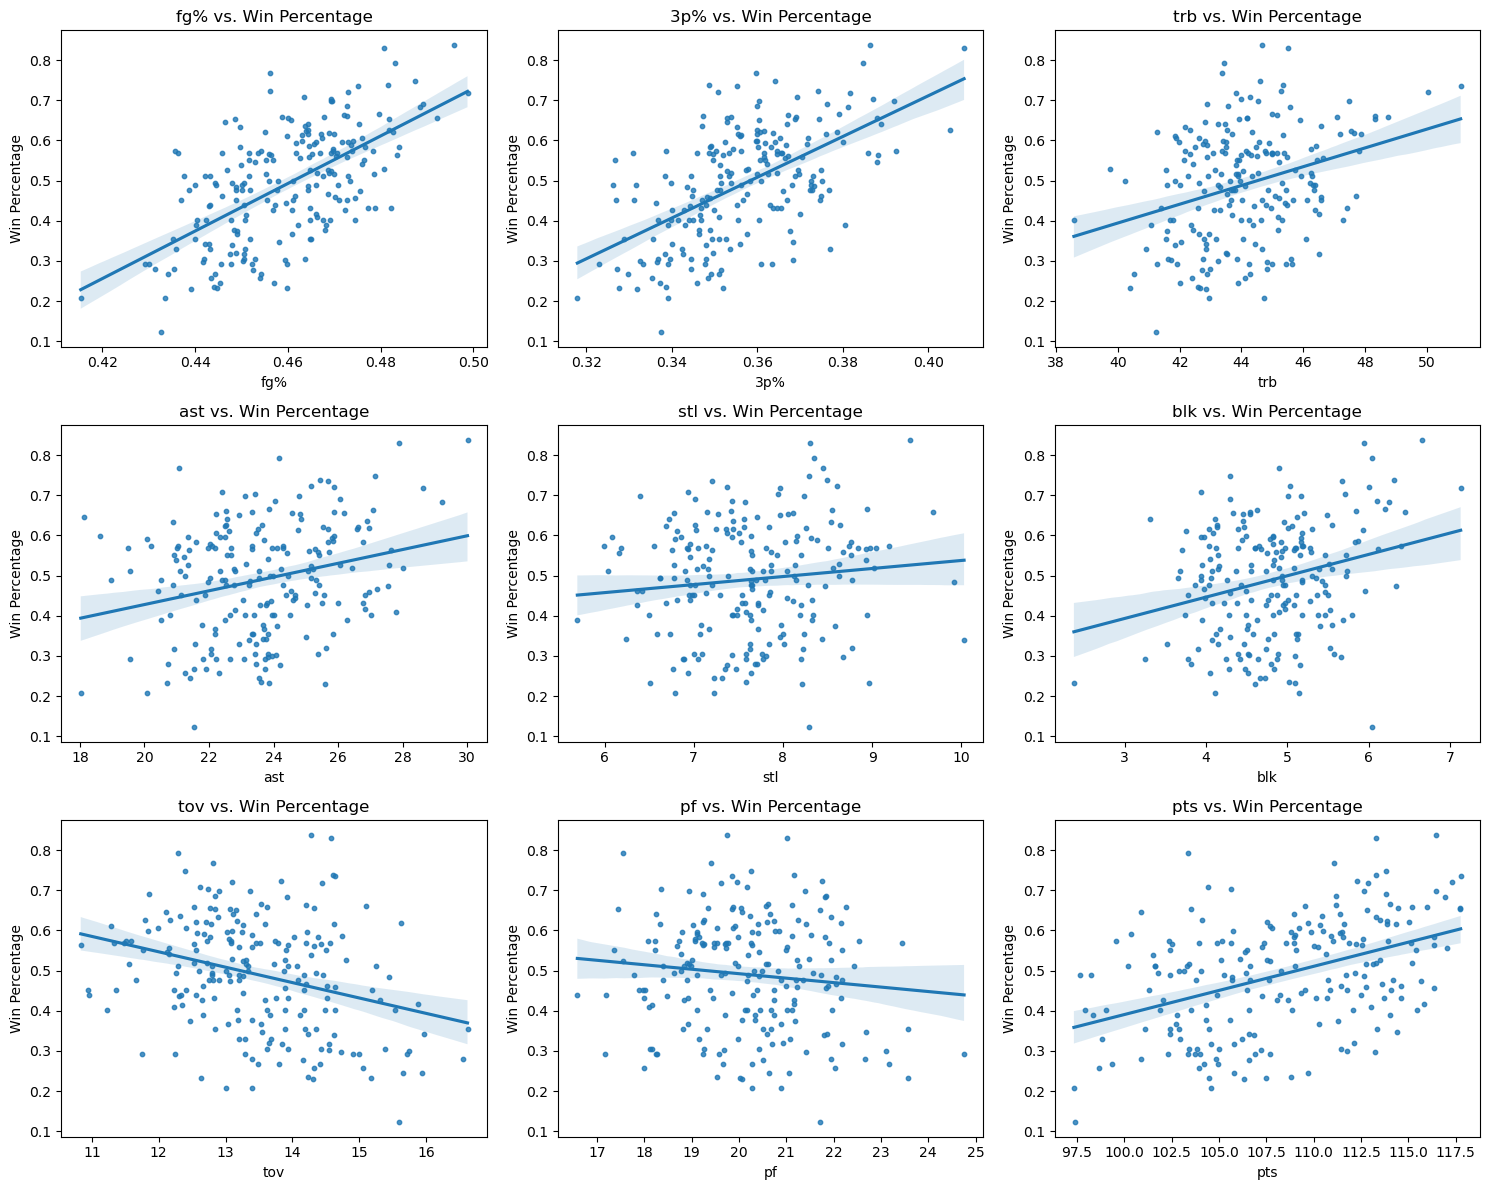

In [7]:
# Visualization #1: Regression Plots Indicating Relationship Between Core Metrics and Winning Percentage

major_stats = ['fg%', '3p%', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'won', 'team', 'season']
major_df = df[major_stats].copy()

major_df['won'] = major_df['won'].map({True: 1, False: 0}).astype(int)

team_avgs = major_df.groupby(['team', 'season']).mean().reset_index()


fig, ax = plt.subplots(3, 3, figsize=(15, 12))
metrics = ['fg%', '3p%', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']

ax = ax.flatten()


for i, metric in enumerate(metrics):
    sns.regplot(x=metric, y='won', data=team_avgs, scatter_kws={'s': 10}, ax=ax[i])
    ax[i].set_title(f'{metric} vs. Win Percentage')
    ax[i].set_xlabel(metric)
    ax[i].set_ylabel('Win Percentage')
    
plt.tight_layout()
plt.show()





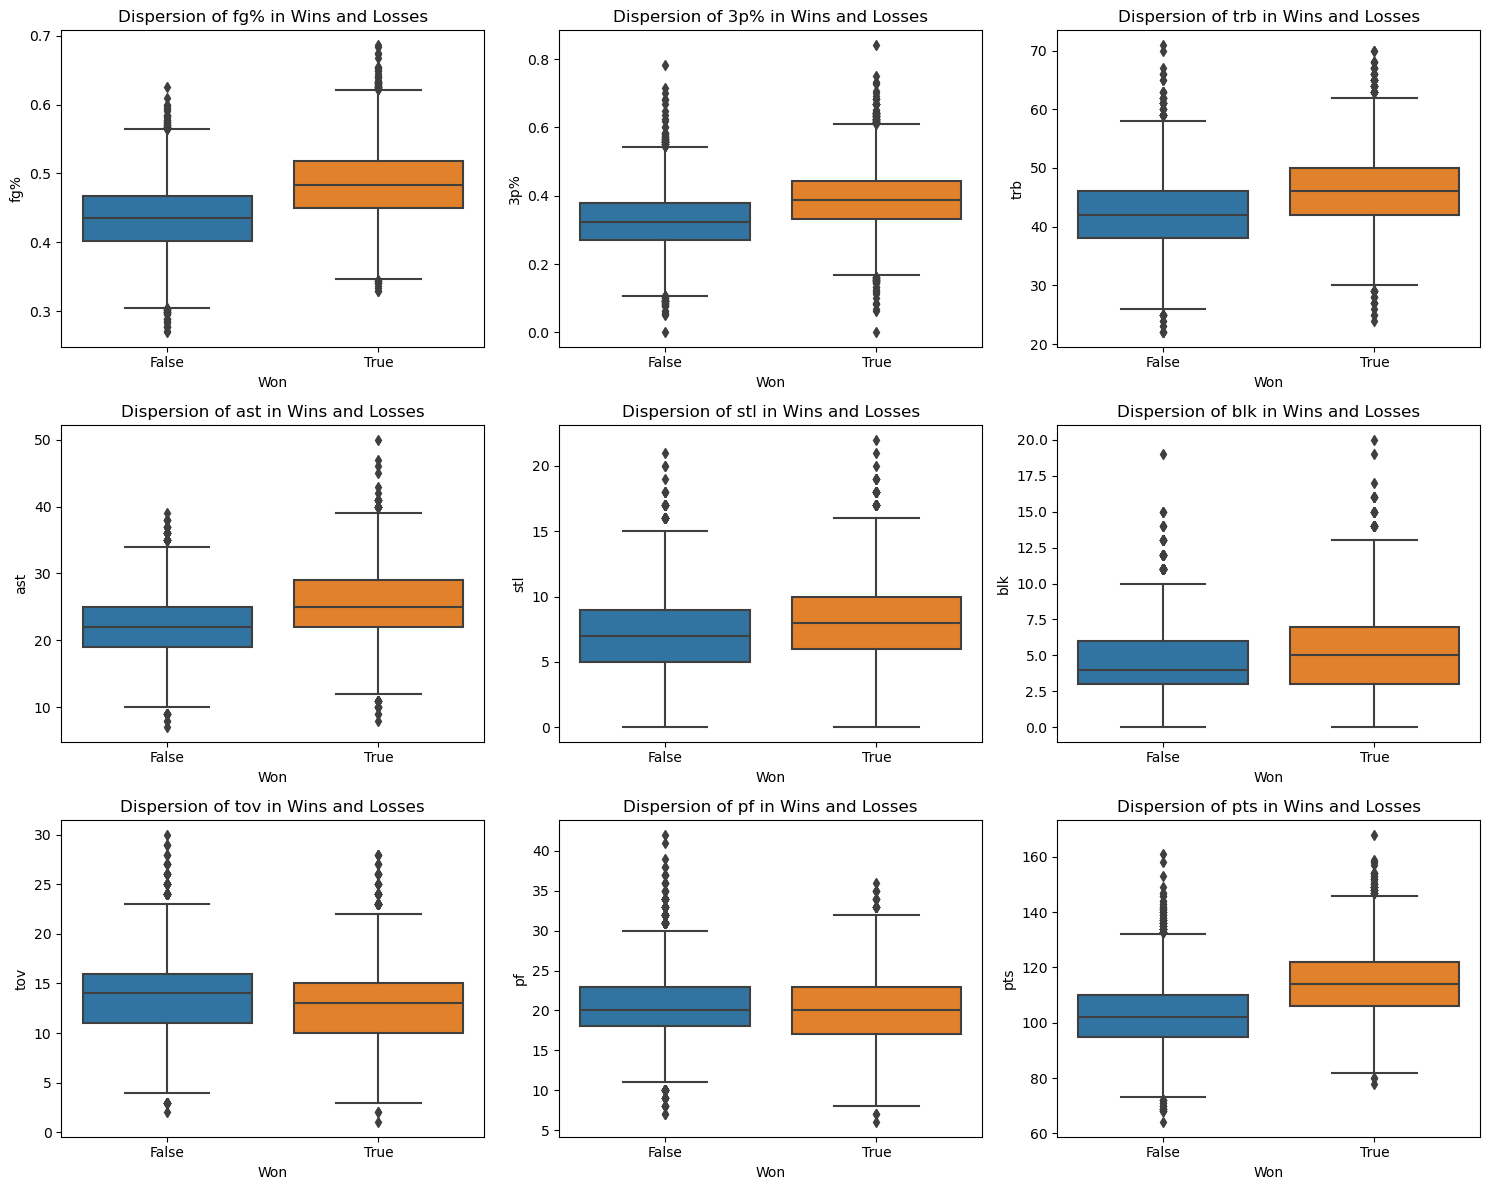

In [9]:
wins = df[df['won'] == True]
losses = df[df['won'] == False]

fig, ax = plt.subplots(3, 3, figsize=(15, 12))
metrics = ['fg%', '3p%', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']

ax = ax.flatten()


for i, metric in enumerate(metrics):
    sns.boxplot(x='won', y=metric, data=df, ax=ax[i])
    ax[i].set_title(f'Dispersion of {metric} in Wins and Losses')
    ax[i].set_xlabel('Won')
    ax[i].set_ylabel(metric)
    
plt.tight_layout()
plt.show()

## Pie Chart Indicating Home-Court Advantage Effectiveness

Here we are plotting the proportion of games where the home team won against the proportion of games where the away team won. We were curious about the true effects that home-court advantage had on the game and discovered that home teams won 57.2% of the time.

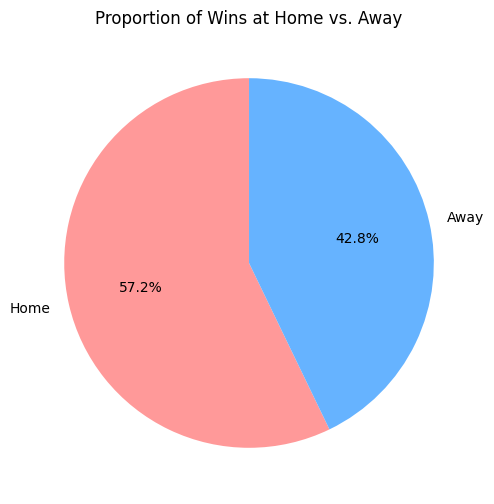

In [20]:
# Visualization #2: Pie Chart Indicating Propo
home_away = df.copy()

home_away = home_away[home_away['won'] == True]


home_wins = len(home_away[home_away['home'] == 1])

away_wins = len(home_away[home_away['home'] == 0])


wins = [home_wins, away_wins]


labels = ['Home', 'Away']

fig, ax = plt.subplots(figsize=(12, 6))

ax.pie(wins, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax.set_title('Proportion of Wins at Home vs. Away')

plt.show()




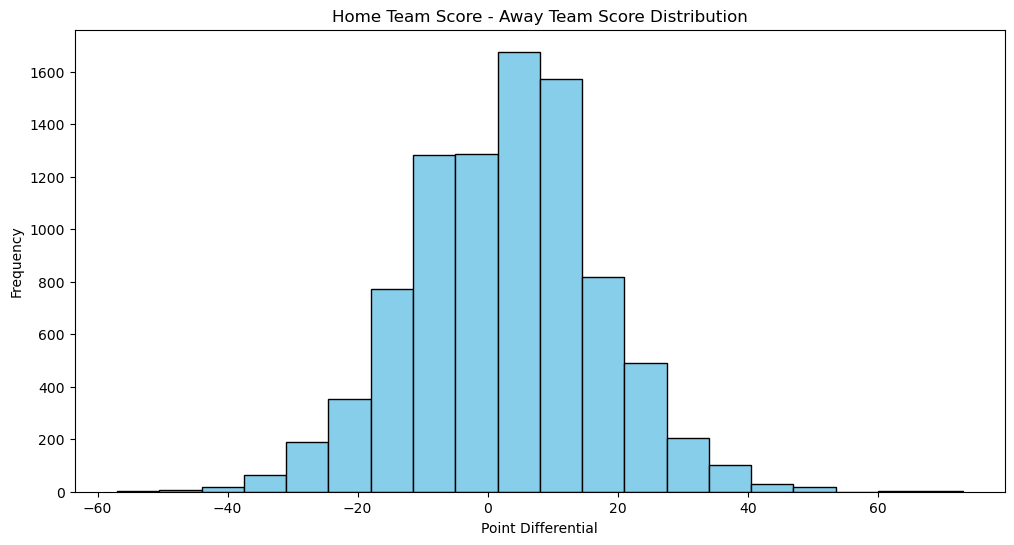

In [10]:
h = df.copy()

h = h[h['home'] == True]

h['Point Differential'] = h['pts'] - h['pts_opp']

fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(h['Point Differential'], bins=20, color='skyblue', edgecolor='black')
ax.set_title('Home Team Score - Away Team Score Distribution')
ax.set_xlabel('Point Differential')
ax.set_ylabel('Frequency')

plt.show()



## Line Chart Showing Average Team Point Totals Over the Course of an Average Season

Many fans and basketball analysts have observed that teams appear to play at a significantly lower intensity in the regular season and elevate their efforts in the postseason. A likely effect of this would be a steady decrease in point averages as the season progresses because teams will put more effort into their defense for the latter games of the season that determine playoff berth. However, our observations contradicted this. Below, one can see that point averages for team increase in the latter parts of the season rather than decrease. This could imply that teams still play competitve defense earler in the year, or that the added intensity of late season/playoff basketball leads to an increase in scoring output. 

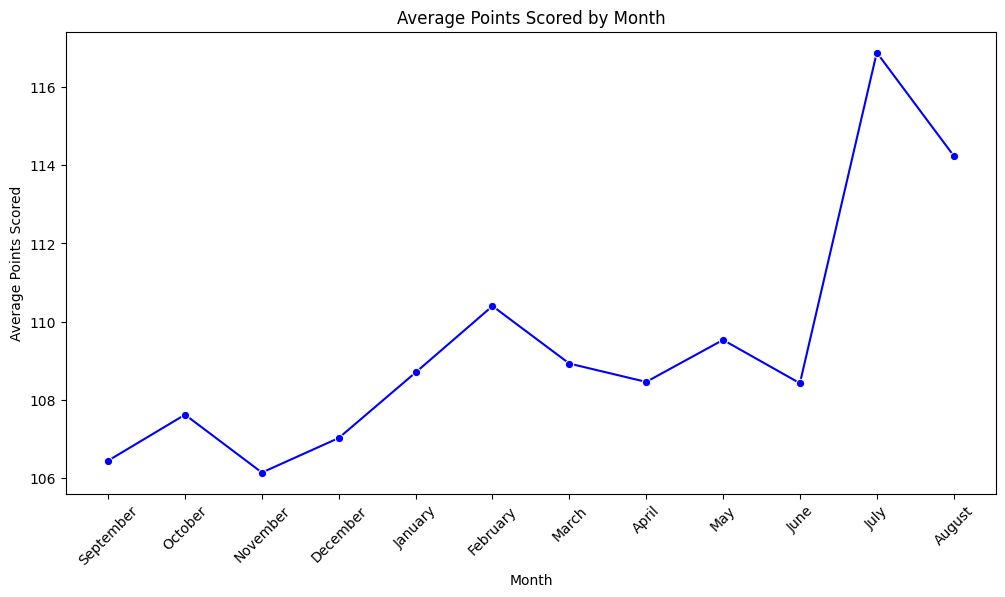

In [26]:
# Visualization #3: Line Chart Indicating Changes in Points Scored Averages at Different Points in the Season
df_month = df.copy()


df_month['month'] = pd.to_datetime(df['date']).dt.month

df_month['month'] = df_month['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

by_month = df_month[['total', 'month']].groupby('month').mean().reset_index()

months = ['September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
by_month['month'] = pd.Categorical(by_month['month'], categories=months, ordered=True)
by_month = by_month.sort_values('month')


fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=by_month, x='month', y='total', marker='o', color='blue')
ax.set_title('Average Points Scored by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Points Scored')
plt.xticks(rotation=45)
plt.show()


# Pie Chart Indicating Usefulness in Having Offensive Advantage vs Defensive Advantage
There are 2 key advanced statistics that summarize a teams efficiency on both sides of the court: offensive rating and defensive rating. Games where a team is superior in both categories are much easier to predict. A challenge arises when one team is strong offensively while the other is strong defensively. We wanted to see, in this subset of games, whether the team with an offensive advantage or a defensive advantage wins more often. 

In [22]:
cols = ['ortg', 'drtg', 'ortg_opp', 'drtg_opp', 'won', 'date', 'season', 'team', 'team_opp']
opp_df = df[cols]
avg_rtg = opp_df[['ortg', 'drtg', 'team', 'season']].groupby(['season', 'team']).mean().reset_index()
opp_avg_rtg = opp_df[['ortg_opp', 'drtg_opp', 'team_opp', 'season']].groupby(['season', 'team_opp']).mean().reset_index()

# append column to opp_df for the team season avg from avg_rtg dataframe
opp_df = opp_df.merge(avg_rtg, on=['team', 'season'], suffixes=('', '_avg')).sort_values(by='date', ascending=True)

# append column to opp_df for the team_opp season avg from avg_rtg dataframe
opp_df = opp_df.merge(opp_avg_rtg, on=['team_opp', 'season'], suffixes=('', '_avg')).sort_values(by='date', ascending=True)

# Filters opp_df to only contain games where team had either offensive superiority and defensive inferiority or offensive inferiority and defensive superiority
opp_df = opp_df[np.logical_xor(opp_df['ortg_avg'] > opp_df['ortg_opp_avg'], opp_df['drtg_avg'] < opp_df['drtg_opp_avg'])]
opp_df['advType'] = np.where(opp_df['ortg_avg'] > opp_df['ortg_opp_avg'], 'Offensive', 'Defensive')

# Filter to account for 'duplicate' rows because 1 game represents a row from each teams perspective
opp_df = opp_df[opp_df['won'] == True] 
opp_df.head()


,ortg,drtg,ortg_opp,drtg_opp,won,date,season,team,team_opp,ortg_avg,drtg_avg,ortg_opp_avg,drtg_opp_avg,advType
295,111.2,98.6,98.6,111.2,True,2015-10-27,2016,DET,ATL,106.969767,106.850000,105.604348,102.407609,Offensive
2205,102.3,95.5,95.5,102.3,True,2015-10-28,2016,TOR,IND,109.788235,106.661765,105.368539,103.617978,Offensive
1677,110.2,104.3,104.3,110.2,True,2015-10-28,2016,OKC,SAS,113.505000,106.364000,111.182609,99.814130,Offensive
1249,102.4,96.9,96.9,102.4,True,2015-10-28,2016,DET,UTA,106.969767,106.850000,106.817073,104.795122,Offensive
1072,113.2,102.4,102.4,113.2,True,2015-10-28,2016,MIA,CHO,106.961458,105.035417,107.158427,105.457303,Defensive


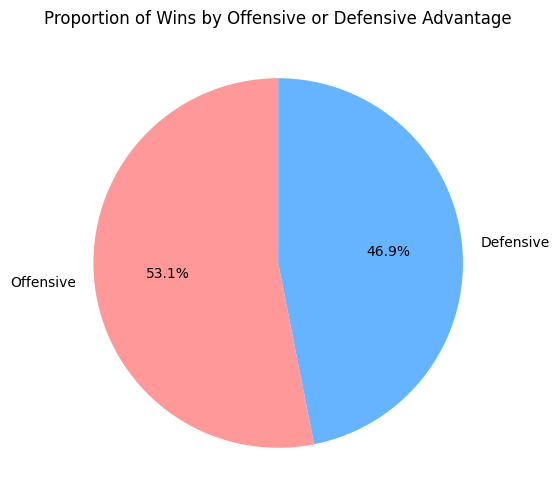

In [23]:
# Visualization #4: Pie Chart Indicating Usefulness in Having Offensive Superiority vs Defensive Superiority
adv_counts = opp_df['advType'].value_counts()


fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(adv_counts, labels=adv_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax.set_title('Proportion of Wins by Offensive or Defensive Advantage')
plt.show()

# Correlation Matrix Showing Correlation Between All Feature Pairs and Target

Our aim here was to visuallize the correlation between features through the use of a heatmap. Pairs with high positive correlation are represented by the redder squares while pairs with low or negative correlation are represented by blue squares. This informs us of which features correlate the best with winning as well as revealing any multicollinearity in our data which would cause problems in our modeling process. 

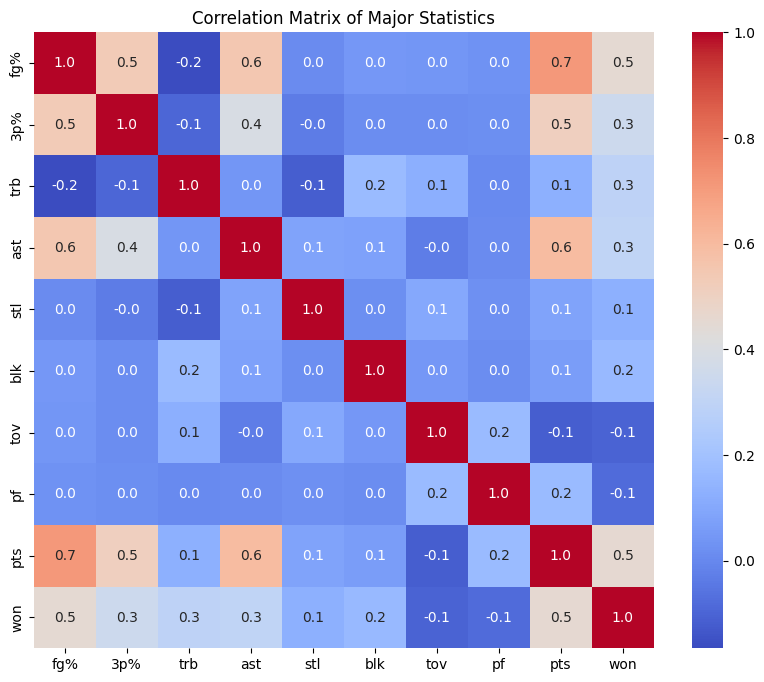

In [25]:
# Visualization #5: Correllation Matrix Showing Correlation Between Features and Winning
major_stats = ['fg%', '3p%', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'won']
major_df = df.copy()
major_df = major_df[major_stats]
major_df['won'] = major_df.loc[:,'won']
corr_matrix = df[major_stats].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Major Statistics')
plt.show()